**Energy Market Resilience Metrics** : *Analyzing Vunerabilities and Preparing for Disruptions*

A project powered by AMDARI to give data analysts the technical expertise and knowledge about the energy market.

**Case Study**: *Energix Enterprise*

In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [2]:
#Read in the datasets from their respective spreadsheets into dataframes
historical_energy_data = pd.read_csv('historical_energy_data.csv')
infrastructure_data = pd.read_csv('infrastructure_data.csv')
market_data = pd.read_csv('market_data.csv')
regulatory_data = pd.read_csv('regulatory_data.csv') 

**Datasets' Structure**

In [3]:
historical_energy_data.head(10) 

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548
5,06/01/2012,Region B,Renewables,84402,6887,0.181034,1864.931578,6030
6,07/01/2012,Region C,Fossil Fuels,43607,35789,0.114841,1277.919940,47213
7,08/01/2012,Region B,Fossil Fuels,28621,39793,0.111914,3281.544398,23154
8,09/01/2012,Region B,Renewables,13823,34394,0.164637,4025.910715,9754
9,10/01/2012,Region C,Renewables,30986,23516,0.137383,1442.316748,23939


In [4]:
infrastructure_data.head(10)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High
5,06/01/2012,Poor,Upgrades,High
6,07/01/2012,Poor,Routine Maintenance,High
7,08/01/2012,Poor,Upgrades,High
8,09/01/2012,Fair,Repairs,High
9,10/01/2012,Poor,Routine Maintenance,High


In [5]:
market_data.head(10)

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264
5,2012-01-06,0.156006,Low,Upward,42504
6,2012-01-07,0.220952,Low,Upward,32219
7,2012-01-08,0.234457,Medium,Upward,14567
8,2012-01-09,0.103928,High,Stable,7266
9,2012-01-10,0.044764,Medium,Downward,31828


In [6]:
regulatory_data.head(10)

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688
5,2012-01-06,New Regulation,Compliant,3318.354926
6,2012-01-07,No change,Compliant,877.800664
7,2012-01-08,Amendment,Non-compliant,4482.471260
8,2012-01-09,New Regulation,Non-compliant,1709.936822
9,2012-01-10,New Regulation,Compliant,1596.962719


In [7]:
market_data.info()
market_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        1000 non-null   object 
 1   Market Price     1000 non-null   float64
 2   Competitor Data  1000 non-null   object 
 3   Market Trends    1000 non-null   object 
 4   Market Demand    1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


,Market Price,Market Demand
count,1000.000000,1000.000000
mean,0.139154,25392.807000
std,0.063492,13980.103619
min,0.030053,836.000000
25%,0.084488,13515.250000
50%,0.138719,24910.500000
75%,0.192279,37102.750000
max,0.249960,49941.000000


**Data Cleaning**

In [8]:
#Changing Date Format on Historical Energy Data.
date_format = "%d/%m/%Y"

historical_energy_data["Date/Time"]=pd.to_datetime(historical_energy_data["Date/Time"], format=date_format, exact=True)

new_date_format = "%Y-%m-%d"

historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"], format=new_date_format, exact=True) 

historical_energy_data.head(1)

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.13163,1564.239198,31604


In [9]:
#Changing Date Format on Infrastructure & Maintainance Records.
date_format = "%d/%m/%Y"

infrastructure_data["Date/Time"]=pd.to_datetime(infrastructure_data["Date/Time"], format=date_format, exact=True)

new_date_format = "%Y-%m-%d"

infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format=new_date_format, exact=True)


infrastructure_data.head(1)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,2012-01-01,Poor,Repairs,High


In [10]:
#Changing Date Format on Market Data.
new_format = "%Y-%m-%d"

market_data["Date/Time"] = pd.to_datetime(market_data["Date/Time"], format=new_format, exact=True)

regulatory_data.head(1)

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306


In [11]:
#Changing Date Format on Regulatory & Compliance Data.
new_date_format = "%Y-%m-%d"

regulatory_data["Date/Time"] = pd.to_datetime(regulatory_data["Date/Time"], format=new_date_format, exact=True)

regulatory_data.head(1)

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306


**Explorative Data Analysis(Investigating the Categorical Columns)**

We will examine the following:

- Location/Region and Energy Source from historical_energy_data dataset.
- Infrastructure Status, Maintainance Activities, and Technology Limitations from infrastructure_data dataset.
- Competitor Data and Market Trends from Market_data dataset.
- Regulatory Changes and Compliance Status from regulatory_data dataset.

In [12]:
#Grouping all datasets as a dataset
datasets = {
    "historical_energy_data": historical_energy_data,
    "infrastructure_data": infrastructure_data,
    "market_data":market_data,
    "Regulatory_data": regulatory_data  
}

#Extracting unique value and their counts for categorical columns
categorical_columns = {
    "historical_energy_data":["Location/Region", "Energy Source"],
    "infrastructure_data":["Infrastructure Status", "Maintenance Activities", "Technology Limitations"], 
    "market_data":["Competitor Data", "Market Trends"],
    "Regulatory_data": ["Regulatory Changes", "Compliance Status"]   
}

categorical_value_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_value_counts[(dataset, column)] = datasets[dataset][column].value_counts()

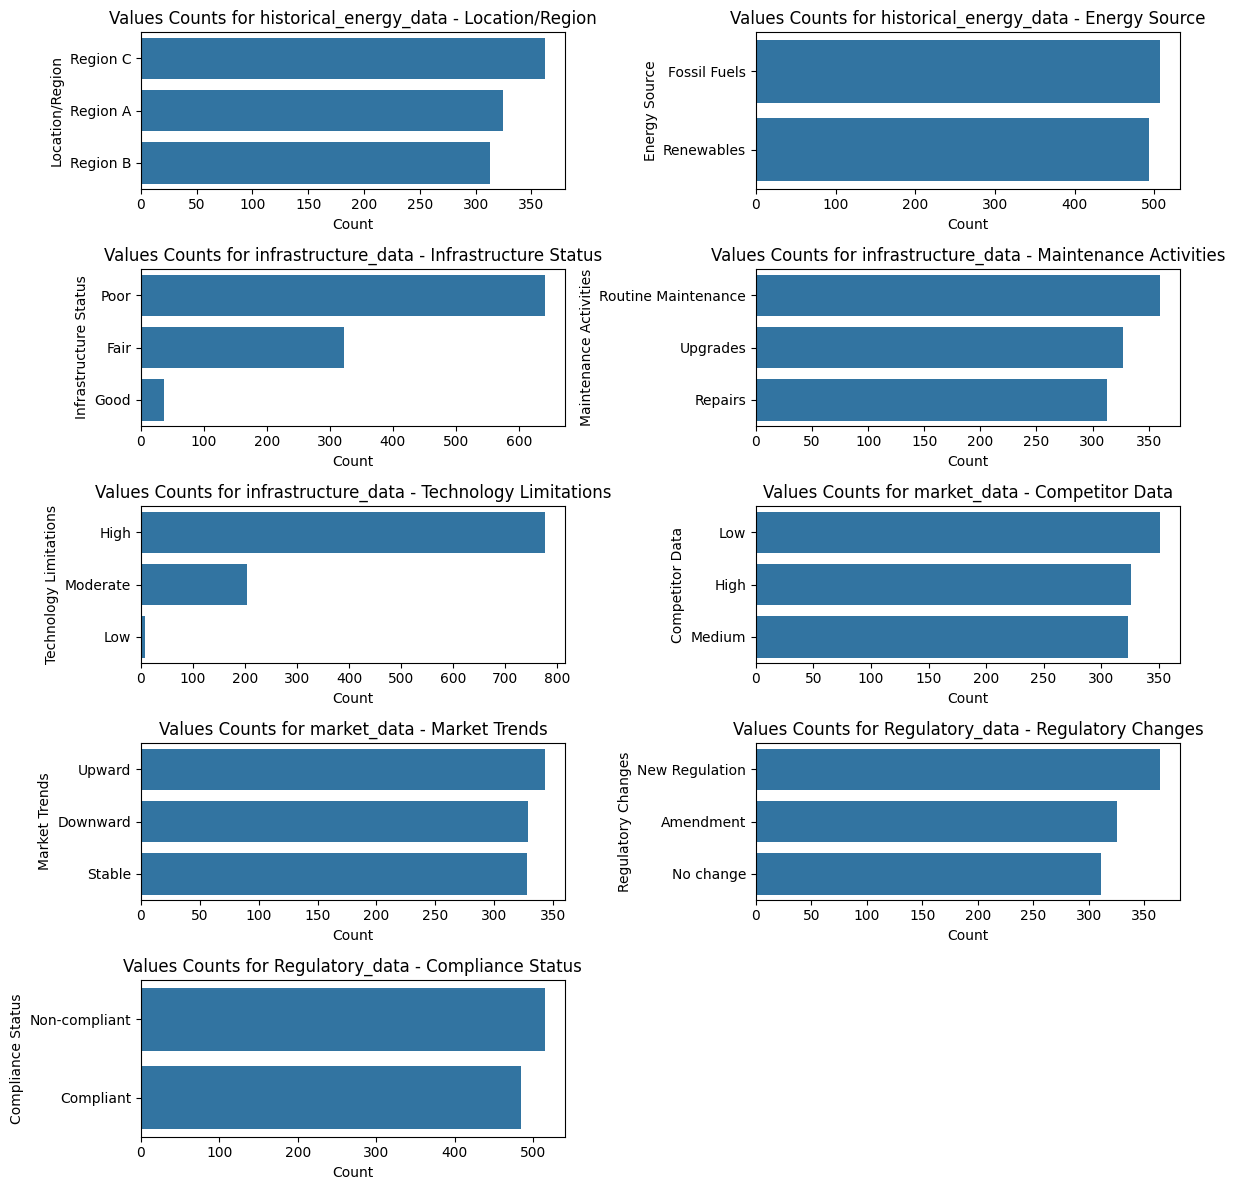

In [13]:
#Visualising 
#Calculating te numbers of rows and columns
num_rows = (len(categorical_value_counts)+ 1) // 2
num_cols = 2

#Create a grid of the subplots 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))

#flatten the axes for easier indexing
axes = axes.flatten()

#iterate through categorical columns and plot the in subplots
for i, ((dataset, column), counts) in enumerate(categorical_value_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title(f"Values Counts for {dataset} - {column}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)

#hide any remaining subplots 
for i in range(len(categorical_value_counts), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

**Energy Demand, Production, and Consumption Over Time**

- We will be examining the trends in energy demand, production and consumption from the historical_energy_data datasets.
- This will gives insights in flunctuations and potetials vulnerabiltes in the energy market.

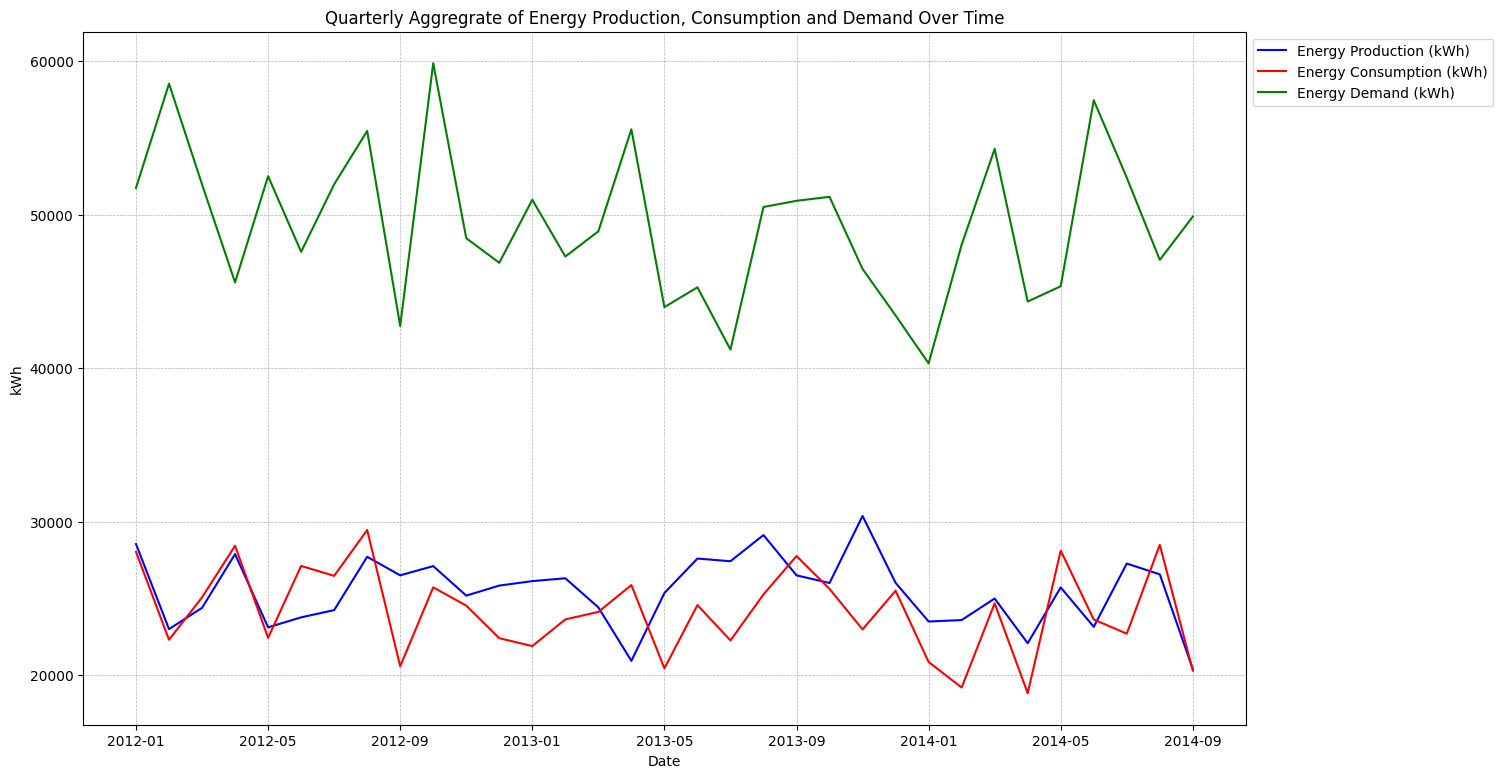

In [14]:
#Extract the month and year from the "Date/Time" column
historical_energy_data['Month']=historical_energy_data['Date/Time'].dt.month
historical_energy_data['Year'] =historical_energy_data['Date/Time'].dt.year

#A new column 'Year-Month' is created for easy plotting
historical_energy_data['Year-Month'] = historical_energy_data['Date/Time'].dt.to_period('M')

#Aggregating data on a monthly basis
monthly_data = historical_energy_data.groupby('Year-Month').mean(numeric_only=True)

#setting figure size
plt.figure(figsize=(15,9))

#plotting
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Production (kWh)', label='Energy Production (kWh)', color='blue', linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Consumption (kWh)', label='Energy Consumption (kWh)', color='red', linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Demand', label='Energy Demand (kWh)', color='green', linestyle='-', linewidth=1.5, errorbar=None)

#Setting the title and labels
plt.title('Quarterly Aggregrate of Energy Production, Consumption and Demand Over Time')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

#setting our labels
labels = monthly_data.index.astype(str).tolist()
n=4
plt.xticks(labels[::n], rotation=360)

plt.tight_layout
plt.show()

**Market Price and Energy Price Over Time**

- To understand the pricing dynamics and its relation to market trends.
- Visualisation of Market Price from the market_data dataset alongside the data from historical_energy_data dataset over time.

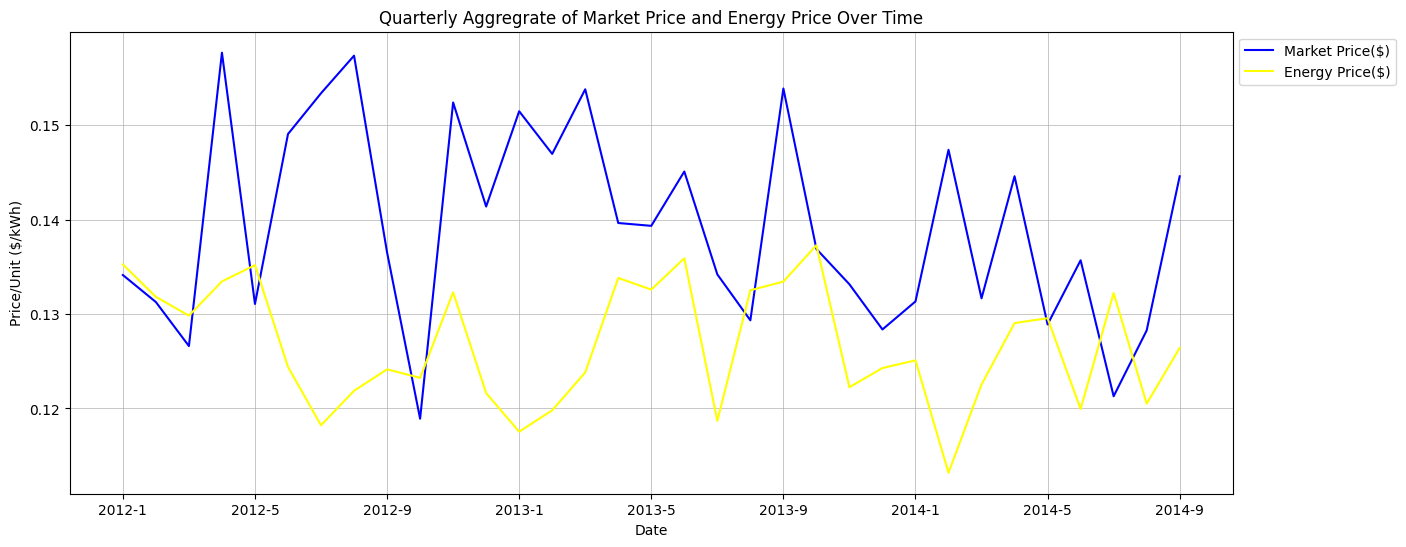

In [15]:
#Merging market_data and historical_energy_data on Date/Time column for combined analysis
merged_data = pd.merge(historical_energy_data, market_data, on='Date/Time', how='inner')

#Setting 'Date/Time' as the index of the Dataframe for aggregation
merged_data['Year'] = merged_data['Date/Time'].dt.year
merged_data['Month'] = merged_data['Date/Time'].dt.month

#Aggregating data on a monthly basis
monthly_merged_data = merged_data.groupby(['Year', 'Month']).mean(numeric_only=True)

#Create a new 'Year-Month' column for plotting 
monthly_merged_data['Year-Month'] = monthly_merged_data.index.get_level_values(0).astype(str)+'-'+monthly_merged_data.index.get_level_values(1).astype(str)

plt.figure(figsize=(15,6))

sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price', label='Market Price($)', color='blue', linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price', label='Energy Price($)', color='yellow', linestyle='-', linewidth=1.5, errorbar=None)

#Setting the title and labels
plt.title('Quarterly Aggregrate of Market Price and Energy Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price/Unit ($/kWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)

#setting our labels
labels = monthly_merged_data['Year-Month'].tolist()
n=4
plt.xticks(labels[::n], rotation=360)

plt.tight_layout
plt.show()


**Energy Demand and Energy Price Correlation**

- Let's check if the energy demand is influenced by the current energy price.

In [16]:
correlation_energy_price = merged_data['Energy Demand'].corr(merged_data['Energy Price'])
correlation_market_price = merged_data['Market Demand'].corr(merged_data['Market Price'])

print(correlation_energy_price)
print(correlation_market_price)

-0.005361840768503396
0.02980230214828854


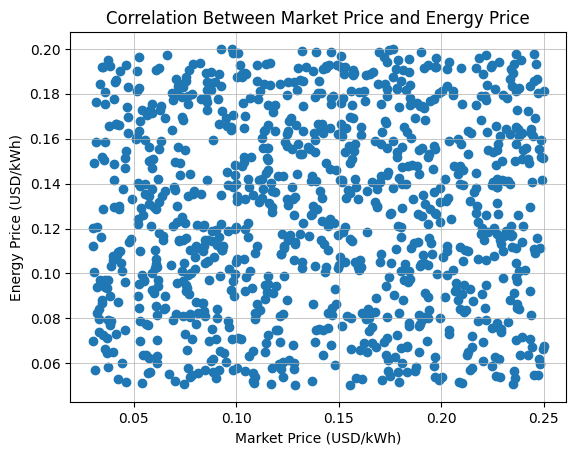

In [17]:
plt.scatter(x=merged_data['Market Price'], y=merged_data['Energy Price'])
plt.title('Correlation Between Market Price and Energy Price')
plt.xlabel('Market Price (USD/kWh)')
plt.ylabel('Energy Price (USD/kWh)')
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)

**Infrastructure Status And Technological Limitations**

- To understand the state of infrastructure and technology over time.
- Visualising the frequency of various infrastructure status values and the distribution of Technology limitations from the infrastructure_data dataset.

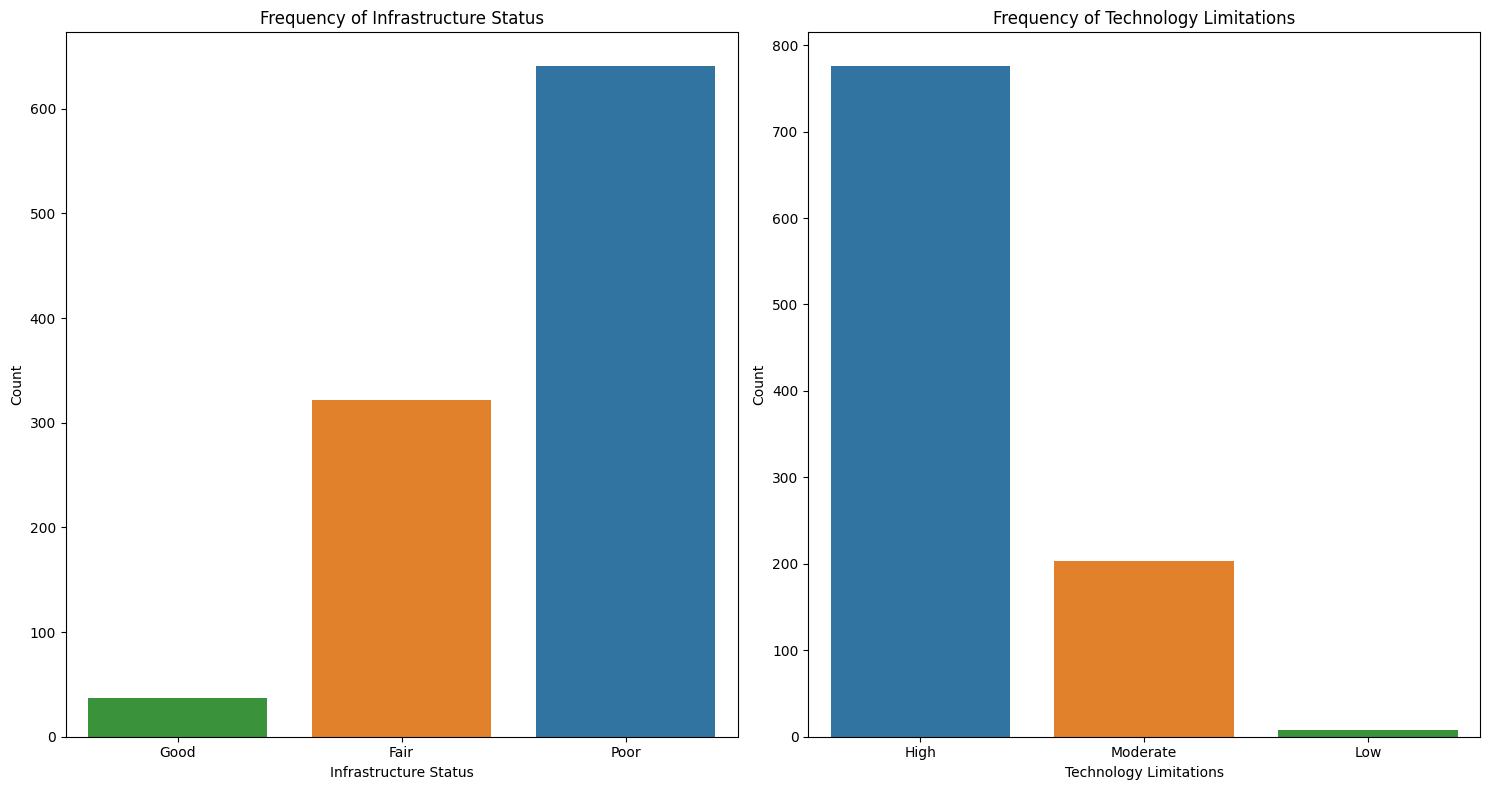

In [18]:
#Setting up the figure and axes 
fig, axes = plt.subplots(1,2, figsize=(15,8))

#Plotting the frequency of Infrastructure Status
sns.countplot(data=infrastructure_data, x='Infrastructure Status', ax=axes[0], order=['Good', 'Fair', 'Poor'], hue='Infrastructure Status', legend=False)
axes[0].set_title('Frequency of Infrastructure Status')
axes[0].set_xlabel('Infrastructure Status')
axes[0].set_ylabel('Count')

#Plotting the frequency of Technology Limitations
sns.countplot(data=infrastructure_data, x='Technology Limitations', ax=axes[1], hue='Technology Limitations', legend=False)
axes[1].set_title('Frequency of Technology Limitations')
axes[1].set_xlabel('Technology Limitations')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**What is the relationship/correlation between infrastructure status and technological limitation?**

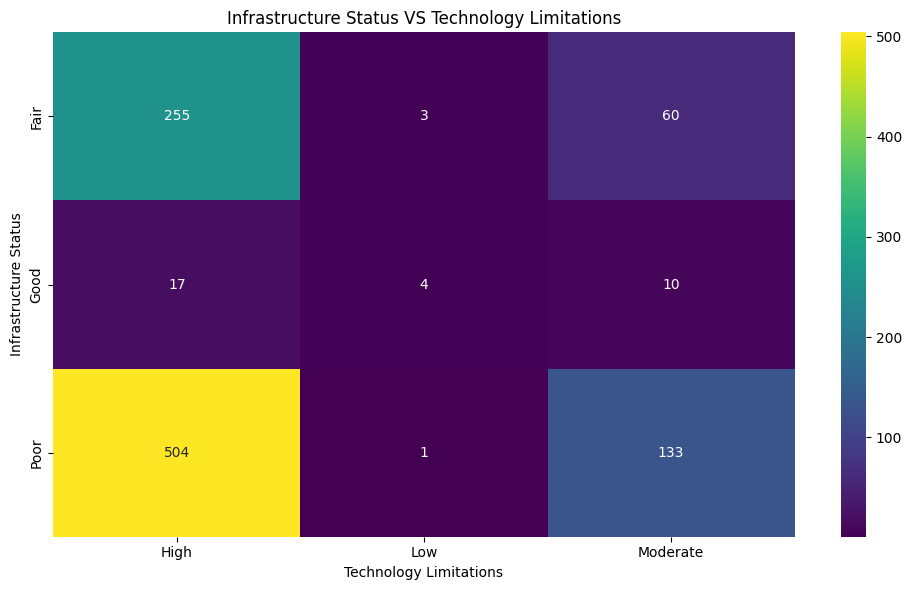

In [19]:
#Crosstab Computation between the Infrastructure Status Column & Technology Limitations.
ct = pd.crosstab(infrastructure_data['Infrastructure Status'], infrastructure_data['Technology Limitations'])

#Setting up the figure size
plt.figure(figsize=(10,6))

#Plotting the likelihood matrix between the two columns from their crosstab computation result.
sns.heatmap(ct, annot=True, cmap='viridis', fmt='.3g')
plt.title('Infrastructure Status VS Technology Limitations')
plt.xlabel('Technology Limitations')
plt.ylabel('Infrastructure Status')

plt.tight_layout()
plt.show()

- Correlation between poor infrastructure status and high technology limitation and the energy production.

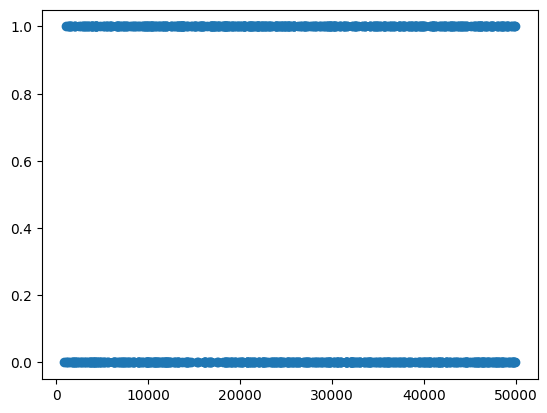

In [20]:
#Quantifying the categorical columns 'infrastructure Status' & 'Technology Limitations'.
infrastructure_data['Poor Infrastructure'] = infrastructure_data['Infrastructure Status'].apply(lambda x: 1 if x == 'Poor' else 0)
infrastructure_data['High_Tech_Limitations'] = infrastructure_data['Technology Limitations'].apply(lambda x: 1 if x == 'High' else 0)

#Finding their resultant.
infrastructure_data['Combined'] = infrastructure_data['Poor Infrastructure'] * infrastructure_data['High_Tech_Limitations']

#Merge Historical Energy data & Infrastructure and Maintainance Records.
merged_data = pd.merge(historical_energy_data, infrastructure_data, on='Date/Time', how='inner')

#Finding the correlation coefficient of Energy Production and the resultant of the categorical columns.
correlation_coefficient = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])

correlation_coefficient
#Plotting a scatter plot to visualize to the correlation coefficient.
plt.scatter(x=merged_data['Energy Production (kWh)'], y=merged_data['Combined'])

**Regulatory Changes and Compliance Costs**

- To understand the impact of regulatory changes.
- Visualising the frequency of various Regulatory changes and the distrubution of Compliance Costs associated with these changes from the regulatory_data dataset.

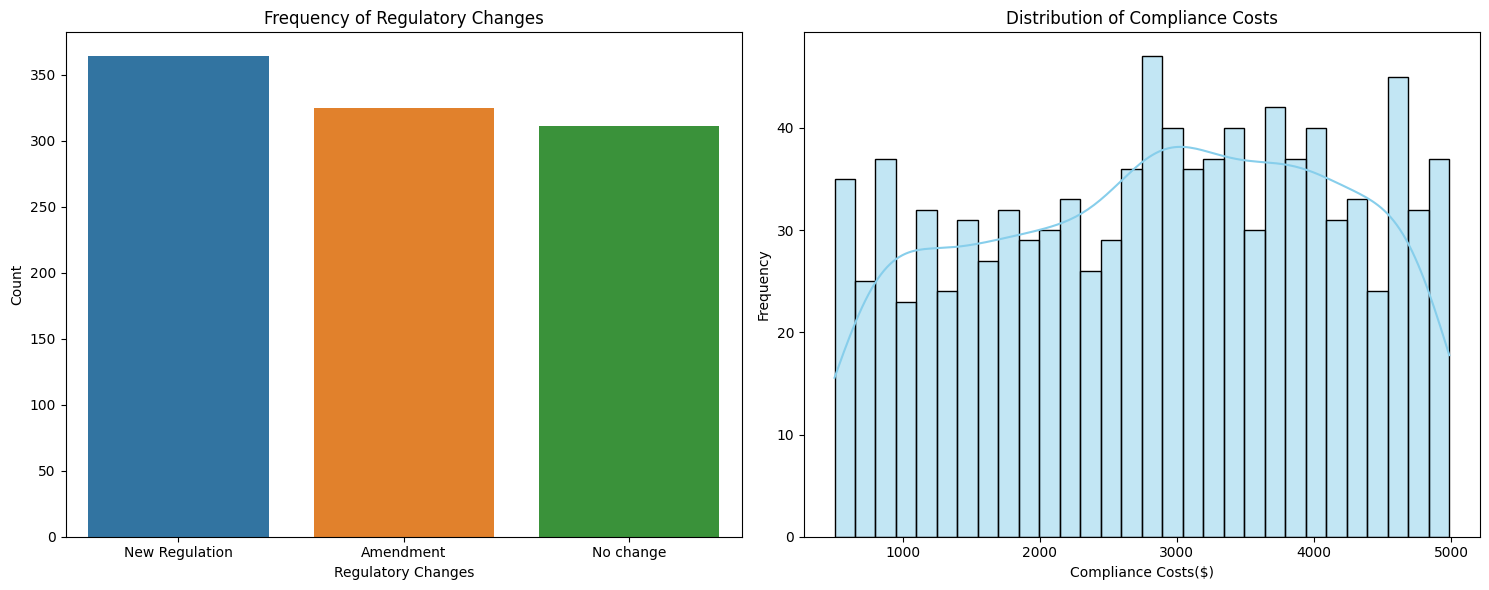

In [21]:
##Setting up the figure and axes
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

#Plotting a countplot for each category in the categorical coloumn 'Regulatory Changes'
sns.countplot(data=regulatory_data, x='Regulatory Changes', ax=ax1, hue='Regulatory Changes', legend=False)
ax1.set_title('Frequency of Regulatory Changes')
ax1.set_xlabel('Regulatory Changes')
ax1.set_ylabel('Count')

#Plotting an histogram and a kde for the Compliance costs columns
sns.histplot(data=regulatory_data, x='Compliance Costs', ax=ax2, bins=30, color='skyblue', kde=True)
ax2.set_title('Distribution of Compliance Costs')
ax2.set_xlabel('Compliance Costs($)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Impact of Regulatory Changes and Operational Cost on Revenue**
- Visualising the relationship between Regulatory Changes and the associated Compliance Costs, as well as the Operational Costs to the Revenue generated from the company.
- Revenue = Energy Consumption * Energy Price
- This will provide insights into the financial implications of regulatory changes cost and operational cost for Energix Enterprise.

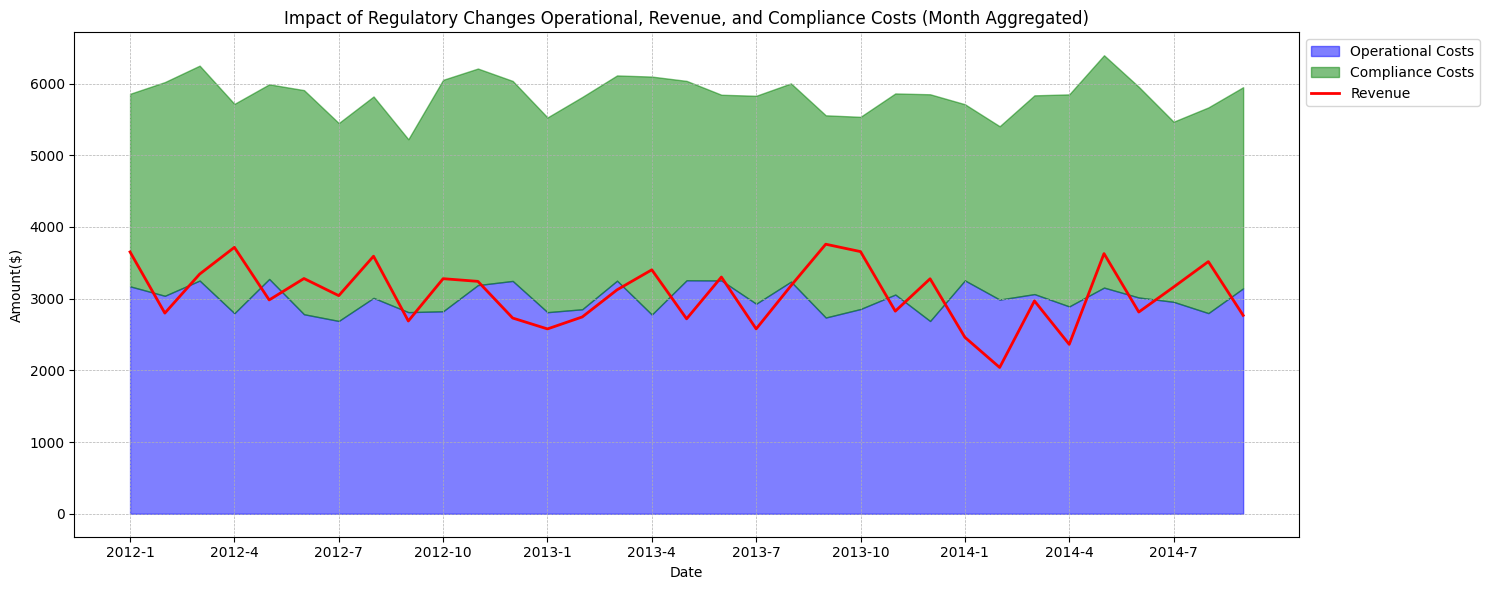

In [22]:
#Calculating Energix Enterprise Revenue
historical_energy_data['Revenue'] = historical_energy_data['Energy Price'] * historical_energy_data['Energy Consumption (kWh)']

#Merge Historical Energy data & Regulatory and Compliance Data.
merged_regulatory_data = pd.merge(historical_energy_data, regulatory_data, on='Date/Time', how='inner')

#Isolate the Year and & Month for each record
merged_regulatory_data['Year'] = merged_regulatory_data['Date/Time'].dt.year
merged_regulatory_data['Month'] = merged_regulatory_data['Date/Time'].dt.month

#Find the monthly aggregate for the merged data.
monthly_aggregate_data = merged_regulatory_data.groupby(['Year', 'Month']).mean(numeric_only=True).reset_index()

#Create a new column to have the year and month in 'Year-Month' format
monthly_aggregate_data['Year-Month'] = monthly_aggregate_data['Year'].astype(str) +'-'+ monthly_aggregate_data['Month'].astype(str)

#Setting the figure size
plt.figure(figsize=(15, 6))

#Plot a composite area chart of both the operational costs and the compliance costs
plt.fill_between(monthly_aggregate_data['Year-Month'], monthly_aggregate_data['Operational Costs'], color='blue', label='Operational Costs', alpha=0.5)
plt.fill_between(monthly_aggregate_data['Year-Month'], monthly_aggregate_data['Operational Costs'], monthly_aggregate_data['Operational Costs'] +  monthly_aggregate_data['Compliance Costs'], color='green', label='Compliance Costs', alpha=0.5)

#Plot a line graph of the revenue of Energix Enterprise
sns.lineplot(data=monthly_aggregate_data, x='Year-Month', y='Revenue', label='Revenue', color='red', linewidth=2)

#Setting other features of the plot
plt.title('Impact of Regulatory Changes Operational, Revenue, and Compliance Costs (Month Aggregated)')
plt.xlabel('Date')
plt.ylabel('Amount($)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
labels = monthly_aggregate_data['Year-Month'].tolist()
n = 3
plt.xticks(labels[::n], rotation=360)
plt.tight_layout()
plt.show()

**Analyzing Competition from Renewable Energy Providers**
- To understand the competition from renewable energy providers and its impact on Energix Enterprise, we will analyze the Energy Source column the historical_energy_data dataset.
- Visualizing the trends in energy production based on the energy source (Foosil Fuels vs. Renewables) over time. This will give us insights into how the production from renewables has evolved and potentially affected the company's market share.

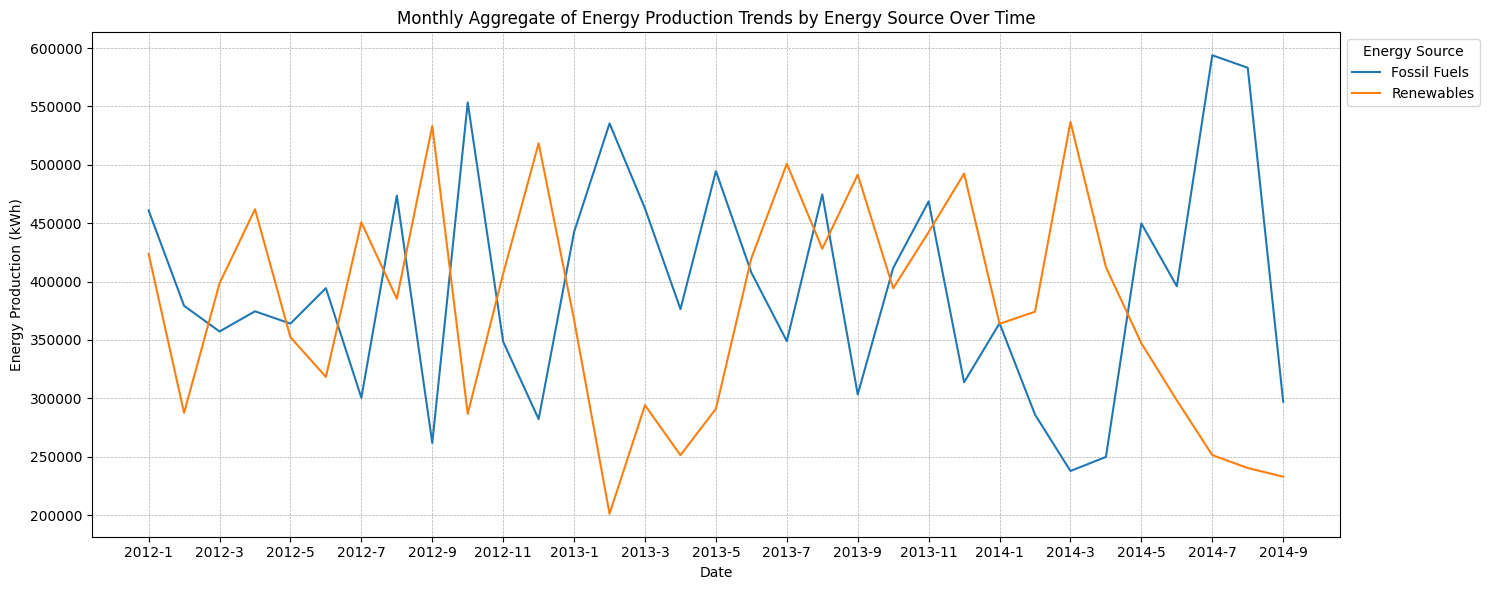

In [23]:
#Calculating the monthly aggreagte of the Energy production of Energix enterprise using the Historical Energy Data
monthly_aggregate_data = historical_energy_data.groupby(['Year', 'Month', 'Energy Source']).sum(numeric_only=True)['Energy Production (kWh)'].reset_index()

#Create a new column to have the year and month in 'Year-Month' format
monthly_aggregate_data['Year-Month'] = monthly_aggregate_data['Year'].astype(str) +'-'+ monthly_aggregate_data['Month'].astype(str)

#Setting the figure size
plt.figure(figsize=(15,6))

#Plot a line graph for each Energy Source Production. i.e. Fossil Fuel and Renewables
sns.lineplot(data=monthly_aggregate_data, x='Year-Month', y='Energy Production (kWh)', hue='Energy Source', errorbar=None)

#Setting other features of the plot
plt.title('Monthly Aggregate of Energy Production Trends by Energy Source Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend(title='Energy Source', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
labels = monthly_aggregate_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=360)
plt.tight_layout()
plt.show()

**General Insights**

- *Dynamic Energy Landscape*: Energix Enterprises experiences marked variances in energy production, consumption amd demand patterns. There are distinct periods where the demand overshadows productions, highlights potential areas of concern in market stability and supply consistency.

- *Pricing Volatility*: Energix's energy pricing exhibits variability in alignment with broader market price trends.Notaly, the energy price remains uncorrelated with energy demand, presenting potential challenges in sales predictability and revenue forecasting.

- *Infrastructure and Technological Concerns*: A significance portion of the company's Infrastructure is categorized as 'Poor'. Coupled with pronounced technology limitations, there's a compelling case for comprehensive infrastructure rejuvenation. Preliminary analysis suggests that periods of 'Poor' infrastructure status and 'High' technology constraints mat correlatewith diminished energy production.

- *Regulatory and Financial Implications*: Energix is continually navigating a changing regulatory landscape, with new mandatesand modifications to existing ones. The financial ramifications, especially in terms of compliances costs and operational expenditures, are substantial. A juxtaposition of these costs with the firm's current revenuetrajectory indicates a pressing profitabilty challenge.

- *Emergence of Renewables*: The energy market is experiencing a paradigm shift wit renewables gaining prominence. Data trends suggests instances where renewable energy production has eclipsed that of fossil fuels. For Energix , this underscoresthe dual challenges of evolving competition and potential erosion of market share.


**Resilience Planning and Recommendations**

- *Balanced Energy Portfolio*: Energix Enterprise should consider diversifying its energy production portfolio to mitigate the risks associated with fluctuations in demand and production. A balanced mix of renewable and non-renewable sources can help stabilize the energy supply and meet demand more consistently.

- *Dynamic Pricing Model*: Given that energy price doesn't correlate with energy demand, Energix should consider implementing a dynamic pricing model. This model can adjust prices based on demand, production costs, and other market factors. Such a model can help in improving sales during high-demand periods and maintaining profitability during low-demand times.

- *Infrastructure Revamp*: With most of the company's infrastructure in 'Poor' status and high technology limitations, Energix should prioritize investments in infrastructure upgrades. Modernizing infrastructure can lead to increased production efficiency, reduced downtimes, and potentially higher energy output.

- *Regulatory Compliance Fund and Operational Cost*: Given the periodic introduction of new regulations and The associated compliance costs and also operational cost. Energix should establish a dedicated fund or reserve to address these unforeseen expenses. This approach can help in budgeting and ensuring that costs don't significantly impact the company's bottom line.

- *Embrace Renewables*: The trend towards renewable energy is evident. Energix should consider increasing its investments in renewable energy technologies and infrastructure. This not only aligns with global sustainability goals but also positions the company to better compete in an evolving energy market.

- *Cost Management & Revenue Generation*: Considering the operational and compliance costs are impacting profitability, Energix should undertake a thorough review of its operations to identify cost-saving opportunities. Additionally, exploring alternative revenue streams, such as energy storage solutions or consultancy services, can further bolster the company's financial position.

- *Stakeholder Engagement*: Engage with regulatory bodies proactively to stay ahead of potential regulatory changes. This proactive approach can help in better preparation and can also influence regulations in a manner favorable to Energix.

- *Market Research & Consumer Insights*: Conduct regular market research to understand consumer preferences, especially concerning renewable energy. This can guide Energix's strategy in terms of energy source diversification and pricing.

In conclusion, while Energix faces challenges in terms of fluctuating demand, aging infrastructure, and increasing competition from renewables, there are clear strategic paths available. By modernizing infrastructure, diversifying energy sources, and adopting a dynamic pricing model, Energix can position itself for sustained growth and profitability in the future energy market.